In [ ]:
# Used packages
from preprocess import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import os
import seaborn as sns
from preprocess import preprocessing
from preparation import preparation

In [ ]:
'''
Plots the confussion matrix from our system results

Receives a vector with the system results and another one with the actual results
Does not return anything but it displays the confussion matrix
'''
def print_confussion_matrix(y_test, y_pred):
    sns.heatmap((confusion_matrix(y_test,y_pred)), annot=True, fmt="d",cmap="crest")
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

'''
Builds a dictionary with the word frequency counts of a string

Receives a preprocessed text
Returns a dictionary with the word frequency counts
'''
def build_word_frequency_histogram(preprocessed_str):
    wordfreq = {}

    # If word has already been found, add 1 to its count. If not, add the word to the dictionary
    for word in preprocessed_str.split():
        if word not in wordfreq:
            wordfreq[word] = 0
        wordfreq[word] += 1
    
    # REturn 10 most frequent words
    return dict(sorted(wordfreq.items(), key=lambda item: item[1], reverse=True)[:10])

In [7]:

# Actual results of our tests. 1 = Plagiarism, 0 = Original
actual_results = [1,1,0,0,1,1,0,0,0,0,0,0,0,0,1]
# aesults found by our system when doing the plagiarism analysis
system_results = []

'''
Main decision function that handles all the main logic in our system.
First, it gathers all the original and suspicious documents for preprocessing.
Then, it calls for the calculation of the cosine similarity between a suspicious and an original text.
Afterwards, it determines whether there is plagiarism or not and it calculates the word frequency histograms.
Finally, it displays all the histograms, ROC Curve and Confussion Matrix.

Receives a file path to the original and suspicious files
Does not return anything but it concludes by showing all the result graphs.
'''
def decision(file_path_originals, file_path_suspicious):
   
    # Preprocessing original texts
    original_texts = [file for file in os.listdir(file_path_originals) if os.path.isfile(os.path.join(file_path_originals, file))]
    processed_original_texts = []
    for original_text in original_texts:
        processed_original_texts.append(preprocessing(file_path_originals + "/" + original_text))

    print("Starting plagiarism detection...")
    print("\n")
    # Preprocessing suspicious texts
    suspicious_texts = [file for file in os.listdir(file_path_suspicious) if os.path.isfile(os.path.join(file_path_suspicious, file))]
    processed_suspicious_texts = []
    for suspicious_text in suspicious_texts:
        processed_suspicious_texts.append(preprocessing(file_path_suspicious + "/" + suspicious_text))
           
    # Comparing suspicious text with original texts
    for k, processed_suspicious_text in enumerate(processed_suspicious_texts):
        print("Analyzing Suspicious text: ", suspicious_texts[k])
        plagiarized_check = False

        for i, processed_original_text in enumerate(processed_original_texts):
            result,max_result = preparation(processed_suspicious_text, processed_original_text)
            
            # Check if plagiarism is detected
            if max_result > 0.9:
                print("\tPlagiarism detected in file: ", original_texts[i])
                print(f'\tMean percentage of plagiarism: {result*100:.1f}%')
                print(f'\tMaximum percentage of plagiarism between sentences: {max_result[0][0]*100:.1f}%')
                print("\t⚠️ ⚠️ ⚠️ ⚠️ ⚠️ ⚠️\n")
                
                
                if not plagiarized_check:
                    system_results.append(1)
                    plagiarized_check = True
                
                    
        # When there is no plagiarism, append 0 to system results
        if not plagiarized_check:
            print("\tNo plagiarism detected\n")
            system_results.append(0)

    # Print results
    tn, fp, fn, tp = confusion_matrix(actual_results, system_results).ravel()
    print(f'Predicted Results: {system_results}')
    print(f'Actual Results: {actual_results}')
    fpr, tpr, thresholds = metrics.roc_curve(actual_results, system_results, pos_label=1)
    print(f'True Positive: {tp}')
    print(f'False Positive: {fp}')
    print(f'True Negative: {tn}')
    print(f'False Negative: {fn}')
    print("False Positive Rate: ", fp/(fp+tn))
    print("True Positive Rate: ", tp/(tp+fn))
    print("AUC:", metrics.auc(fpr, tpr))

    # Display graphs
    print_confussion_matrix(actual_results, system_results)


Starting plagiarism detection...


Analyzing Suspicious text:  FID-01.txt
	Plagiarism detected in file:  org-001.txt
	Mean percentage of plagiarism: 29.4%
	Maximum percentage of plagiarism between sentences: 100.0%
	⚠️ ⚠️ ⚠️ ⚠️ ⚠️ ⚠️

	Plagiarism detected in file:  org-010.txt
	Mean percentage of plagiarism: 17.9%
	Maximum percentage of plagiarism between sentences: 99.6%
	⚠️ ⚠️ ⚠️ ⚠️ ⚠️ ⚠️

Analyzing Suspicious text:  FID-02.txt
	Plagiarism detected in file:  org-070.txt
	Mean percentage of plagiarism: 32.5%
	Maximum percentage of plagiarism between sentences: 100.0%
	⚠️ ⚠️ ⚠️ ⚠️ ⚠️ ⚠️

Analyzing Suspicious text:  FID-03.txt
	No plagiarism detected

Analyzing Suspicious text:  FID-04.txt
	No plagiarism detected

Analyzing Suspicious text:  FID-05.txt
	Plagiarism detected in file:  org-060.txt
	Mean percentage of plagiarism: 21.2%
	Maximum percentage of plagiarism between sentences: 100.0%
	⚠️ ⚠️ ⚠️ ⚠️ ⚠️ ⚠️

Analyzing Suspicious text:  FID-06.txt
	Plagiarism detected in file:  org-043

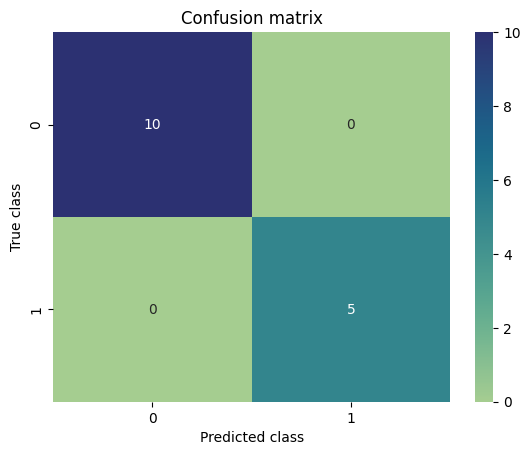

In [8]:
# Call the main system function to kick-off the plagiarism detector
decision("original_files", "suspicious_files")
